In [65]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Oversampling and under sampling
import imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
import random
from IPython.display import display
from PIL import Image


## Feature Engineer / Pre-processing

In [2]:
df_train = pd.read_csv("train.csv")
df_train['y']=df_train['y'].values-1

In [3]:
df_test = pd.read_csv("test.csv")

In [4]:
df_train

,id,main.pos,fun.pos,when,y,E1A1,E1A2,E1A3,E1A4,E1A5,...,M2V2039,M2V2040,M2V2041,M2V2042,M2V2043,M2V2044,M2V2045,M2V2046,M2V2047,M2V2048
0,1,LHCB-P18,QSCB-18-C2,2017-06,0,-0.576589,-0.951065,0.944338,-0.086406,0.253089,...,-0.017011,-0.101842,0.027109,0.168339,0.152390,0.000410,-0.126250,0.072403,0.214993,0.184996
1,2,LHCB-6,QSCB-6-CP6,2018-09,0,0.970694,1.524991,1.813341,0.447012,-1.038631,...,0.106717,-0.057328,-0.146602,0.069251,0.351492,0.106101,0.192691,0.167834,-0.170475,-0.236751
2,3,LHCB-8,QSCB-8-CP7,2022-11,0,1.065262,0.461292,0.416869,0.460564,-0.019386,...,0.198017,-0.044788,0.011786,-0.037881,-0.152690,-0.104267,0.037444,0.489454,0.268134,-0.117367
3,4,LHCB-8,QSCB-8-CP1,2023-04,0,-0.341942,0.614190,0.904430,0.727268,0.187494,...,0.168140,-0.071131,0.067982,-0.023509,-0.028273,0.000943,-0.018128,0.013366,0.015902,0.043247
4,5,LHCB-P18,QSCB-18-C1,2017-04,0,-0.569563,0.368497,-0.269832,-0.179988,-0.065328,...,0.082521,0.105978,0.020868,0.173724,-0.037431,0.147695,0.038233,-0.047549,0.101227,-0.109760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,1012,LHCB-4,QSCB-4-CP1,2019-03,0,-0.094653,-0.273495,0.927676,-0.244089,0.394102,...,0.076421,-0.017458,0.113222,0.081531,-0.118022,-0.068159,-0.160683,-0.054098,-0.043842,0.079474
659,1013,LHCB-6,QSCB-6-CP1,2022-05,0,-0.447106,-0.074231,0.331543,0.150676,-0.050445,...,0.137185,0.240015,0.169615,0.068595,0.097196,-0.020113,-0.010522,0.063634,0.096408,-0.085637
660,1014,LHCB-P18,QSCB-18-C2,2018-04,0,0.264532,1.554129,-1.447155,0.442756,2.655931,...,-0.037920,0.087096,-0.399536,-0.121802,-0.027615,-0.190010,-0.099357,-0.026138,-0.008852,-0.108788
661,1015,LHCB-4,QSCB-4-CP7,2017-01,0,-0.522473,-0.007026,0.361770,-0.630256,-0.851504,...,-0.256542,-0.215720,-0.006428,0.037543,0.120194,0.155707,0.156359,0.280801,0.155129,0.176686


In [5]:
df_train.shape

(663, 49157)

In [6]:
#CHANGING THE COLUMNS FROM STRINGS TO INTEGER
m_list = df_train['main.pos'].unique()
f_list = df_train['fun.pos'].unique()
w_list = df_train['when'].unique()

def string_to_num(dataframe, fun_list , main_list , when_list):
    df= dataframe.copy(deep=True)
    
    a = dict(zip(fun_list,range(len(fun_list))))
    b = dict(zip(main_list,range(len(main_list))))
    c = dict(zip(when_list,range(len(when_list))))

    df['fun.pos'] = df['fun.pos'].apply(lambda x: a[x] ) / len(f_list)
    df['main.pos'] = df['main.pos'].apply(lambda x: b[x] ) / len(m_list)
    df['when'] = df['when'].apply(lambda x: c[x] ) / len(w_list)
    
    return(df)

In [7]:
print(df_train.columns)

Index(['id', 'main.pos', 'fun.pos', 'when', 'y', 'E1A1', 'E1A2', 'E1A3',
       'E1A4', 'E1A5',
       ...
       'M2V2039', 'M2V2040', 'M2V2041', 'M2V2042', 'M2V2043', 'M2V2044',
       'M2V2045', 'M2V2046', 'M2V2047', 'M2V2048'],
      dtype='object', length=49157)


In [8]:
#CREATING ALL THE LIST WITH THE SENSOR NAMES
sensor_name = list([ name[:3] for name in list(df_train.columns)[5:]])
res = []
[res.append(x) for x in sensor_name if x not in res]
sensor_name = res

measuere_point_name = list([ name[:2] for name in sensor_name])
res = []
[res.append(x) for x in measuere_point_name if x not in res]
measuere_point_name = res

# instants label ROIs-wise
point_time_series = [[instant for instant in list(df_train.columns)[5:] if (point == instant[:3])] for point in sensor_name]

# instants label prefix
instant_names = list([ name[3:] for name in point_time_series[0]])
res = []
[res.append(x) for x in instant_names if x not in res]
instant_names = res

In [9]:
def normalization(dataframe):
    range_list = list()
    
    for label in ['A','H','P','V']:
        current_columns = [ name for  name in list(df_train.columns)[5:] if label in name] 
        current_min = dataframe[current_columns].min().min()
        current_max = dataframe[current_columns].max().max()
        quantiles = np.quantile(df_train[current_columns].values, [0.01,0.99])
        #range_dict.append(current_max-current_min)
        range_list.append(quantiles[1]-quantiles[0])                        
        
    return(np.array(range_list*6))

In [10]:
'''
for label in ['A','H','P','V']:
        current_columns = [ name for  name in list(df_train.columns)[5:] if label in name] 
        print(df_train[current_columns].min().min())
        print(np.quantile(df_train[current_columns].values, [0.01,0.99]))
        print(df_train[current_columns].max().max())
        print('------------------------------------------')
'''

"\nfor label in ['A','H','P','V']:\n        current_columns = [ name for  name in list(df_train.columns)[5:] if label in name] \n        print(df_train[current_columns].min().min())\n        print(np.quantile(df_train[current_columns].values, [0.01,0.99]))\n        print(df_train[current_columns].max().max())\n        print('------------------------------------------')\n"

In [11]:
#CREATE A LIST OF DATAFRAME WHERE EACH DATAFRAME IS A SINGLE OBSERVATION WITH SHAPE 2048x24
def reshape_series_by_observation(dataframe, norm_boolean, norm_range):

    observations = [0]*dataframe.shape[0]

    # create list of patient-dataframe whre each columns is a ROI time series
    for i in range(dataframe.shape[0]):
        #observations[i] = pd.DataFrame(np.transpose(np.reshape(dataframe.loc[i,point_time_series[0][0]:].values, (24,2048))), index= instant_names , columns = sensor_name )
        if norm_boolean:
            observations[i] = pd.DataFrame(np.transpose(np.reshape(dataframe.loc[i,point_time_series[0][0]:].values, (24,2048))), index= instant_names , columns = sensor_name )/norm_range
        else:
            observations[i] = pd.DataFrame(np.transpose(np.reshape(dataframe.loc[i,point_time_series[0][0]:].values, (24,2048))), index= instant_names , columns = sensor_name )
            
    return(observations)

In [114]:
def ts_plot(observations, observation_number):
    colors = ['red','grey','orange','blue']
    fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(40, 8))
    plt.subplots_adjust(hspace=0.3)
    #fig.suptitle("TIME SERIES FIRST OBSERVATION", fontsize=18)
    line_width = 0.2
    # loop through tickers and axes
    for i,ax in enumerate( axs):
        # filter df for ticker and plot on specified axes
        observations[observation_number][[sensor_name[i*4]]].plot(ax=ax[0],lw =line_width,color= colors[0] ,)
        ax[0].set_ylim(-1,1) 
        ax[0].set_xlabel("")
        observations[observation_number][[sensor_name[i*4+1]]].plot(ax=ax[1],lw =line_width,color= colors[1] ,)
        ax[1].set_ylim(-1,1) 
        ax[1].set_xlabel("")
        observations[observation_number][[sensor_name[i*4+2]]].plot(ax=ax[2],lw =line_width,color= colors[2] ,)
        ax[2].set_ylim(-1,1) 
        ax[2].set_xlabel("")
        observations[observation_number][[sensor_name[i*4+3]]].plot(ax=ax[3],lw =line_width,color= colors[3] ,)
        ax[3].set_ylim(-1,1) 
        ax[3].set_xlabel("")
        

    plt.show();

In [13]:
def splitting_corr(dataframe_processed,observations_list , label_split ,new_shape_row):
    
    split_by_measure_point=dict(zip(label_split,[0]*len(label_split)))
    
    for point in label_split:
        current_sensor = [sensor  for sensor in sensor_name if sensor[0]== point]
        combination = math.comb(len(current_sensor), 2)
        current_dataframe = pd.DataFrame(np.zeros(shape=(dataframe_processed.shape[0],combination)), columns=[str(s)+'corr' for s in range(1,combination+1)], index=range(dataframe_processed.shape[0]))

        for i,observation in enumerate(observations_list):
            corr_values = []
            for K in range(1,len(current_sensor)):
                corr_values = corr_values + list(np.diag(observation[current_sensor].astype('float64').corr().to_numpy(), k=K))
            current_dataframe.iloc[i] = np.array(corr_values)
        if dataframe_processed.shape[0] == new_shape_row:
            split_by_measure_point[point] = pd.concat([dataframe_processed.loc[:,:'y'],current_dataframe]  , axis=1  )
        else:
            split_by_measure_point[point] = pd.concat([dataframe_processed.loc[:,:'when'],current_dataframe]  , axis=1  )
            
    return (split_by_measure_point) #DICT WITH THE KEY IS THE SENSOR ZONE AND THE VALUE IS DATAFRAME OF CORRELATION FOR THE SENSOR ZONE    

In [14]:
'''
df_test_processed = string_to_num(df_test, f_list , m_list , w_list)
df_test_processed = df_test_processed.drop(['id'],axis=1)

norm_range = normalization(df_test_processed)
test_observations = reshape_series_by_observation(df_test_processed, True, norm_range)

split_test_corr = splitting__corr(df_test,test_observations, ['E','M'] ,new_shape_row) 
'''

"\ndf_test_processed = string_to_num(df_test, f_list , m_list , w_list)\ndf_test_processed = df_test_processed.drop(['id'],axis=1)\n\nnorm_range = normalization(df_test_processed)\ntest_observations = reshape_series_by_observation(df_test_processed, True, norm_range)\n\nsplit_test_corr = splitting__corr(df_test,test_observations, ['E','M'] ,new_shape_row) \n"

In [15]:
'''
prova_processed = string_to_num(df_train, f_list , m_list , w_list)
#prova_processed = df_test_processed.drop(['id'],axis=1)

norm_range = normalization(prova_processed)
prova_observations = reshape_series_by_observation(prova_processed, True, norm_range)



split_prova_corr = splitting_corr(prova_processed,prova_observations, ['E','M'] ,prova_processed.shape[0]) 
'''

"\nprova_processed = string_to_num(df_train, f_list , m_list , w_list)\n#prova_processed = df_test_processed.drop(['id'],axis=1)\n\nnorm_range = normalization(prova_processed)\nprova_observations = reshape_series_by_observation(prova_processed, True, norm_range)\n\n\n\nsplit_prova_corr = splitting_corr(prova_processed,prova_observations, ['E','M'] ,prova_processed.shape[0]) \n"

## Tuning Parameters

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
import itertools
from xgboost import XGBClassifier
import math
import warnings
warnings.filterwarnings("ignore")

In [17]:
def GS(models,X_processed, label_classificators):
    skf=StratifiedKFold(n_splits=3,shuffle=True, random_state=42)
    y=X_processed['y']
    x=X_processed.drop(['y'], axis=1)
    
    scores=dict()
    for model in models:
        scores[str(model)]=[]
    
    
    for train, test in tqdm(skf.split(x,y)):
        
        #####################################
        #print(sorted(list(Counter(y[train]).items())))
        k_neig = sorted(list(Counter(y[train]).items()))[2][1]
        smote = SMOTE( random_state=42 , k_neighbors= k_neig-1)
        
        # Randomly over sample the minority class
        random.seed(42)
        X_train_ros, y_train_ros = smote.fit_resample(x.loc[list(train),:], y[train])
        X_test, y_test = x.loc[list(test),:], y[test]
        
        
        num_first_class = sorted(list(Counter(y_train_ros).items()))[0][1]
        X_train_ros.insert(4, 'y', y_train_ros)
        
        y2_index_remove = list(set(list(random.sample(list(X_train_ros.loc[X_train_ros['y']==1].index), int(num_first_class*0.2 )))).difference(set(list(X_processed.loc[X_processed['y']==1].index))))
        X_train_ros=X_train_ros.drop(y2_index_remove)                                                                                                   
        y3_index_remove = list(set(list(random.sample(list(X_train_ros.loc[X_train_ros['y']==2].index), int(num_first_class*0.8)))).difference(set(list(X_processed.loc[X_processed['y']==2].index))))
        X_train_ros=X_train_ros.drop(y3_index_remove)
        X_train_ros = X_train_ros.reset_index(drop=True)
        
        X_train_ros= X_train_ros.sample(frac=1).reset_index(drop=True)
        y_test=y_test.reset_index(drop=True)
        X_test=X_test.reset_index(drop=True)
        
        
        new_shape_row=X_train_ros.shape[0]
                
                               
        
        norm_range = normalization(X_train_ros)                       
        train_ros_observations = reshape_series_by_observation(X_train_ros, True, norm_range)

        split_train_corr = splitting_corr(X_train_ros , train_ros_observations , label_classificators ,new_shape_row) 
        
        test_observations = reshape_series_by_observation(X_test, True, norm_range)

        split_test_corr = splitting_corr(X_test , test_observations , label_classificators ,new_shape_row) 
        #####################################                     
                               
        y_test=y.loc[test]
        for model in models:
            y_pred=Model(model , X_test.shape[0] , split_train_corr, split_test_corr , label_classificators)
            scores[str(model)].append(BAS(y_pred,y_test))

    return(scores)

In [18]:
df_train.columns

Index(['id', 'main.pos', 'fun.pos', 'when', 'y', 'E1A1', 'E1A2', 'E1A3',
       'E1A4', 'E1A5',
       ...
       'M2V2039', 'M2V2040', 'M2V2041', 'M2V2042', 'M2V2043', 'M2V2044',
       'M2V2045', 'M2V2046', 'M2V2047', 'M2V2048'],
      dtype='object', length=49157)

In [19]:
def Model(model , len_test , train_split , test_split , label_classificators):
    
    result2 = pd.DataFrame(np.zeros((len_test,len(label_classificators))) , columns= label_classificators )
    
    for point in label_classificators:
        #X = train_split[point].copy(deep=True).drop(['id'], axis=1)
        X = train_split[point].copy(deep=True).drop(['id','main.pos', 'fun.pos', 'when',], axis=1)
        
        Y_Train=X['y']
        X_Train = X.drop(['y'], axis = 1)
        #X_Train = X.drop(['main.pos', 'fun.pos', 'when', 'y'], axis = 1)
        
        
        #x_test =  test_split[point].copy(deep=True).drop(['id'], axis=1)
        x_test =  test_split[point].copy(deep=True).drop(['id', 'main.pos', 'fun.pos', 'when'], axis=1)
        
        model.fit(X_Train, Y_Train)

        # Make predictions
        result2[point] = model.predict(x_test)
    
    #result2[result2.values!=1].drop_duplicates()
    #anomalies = result2[result2.values!=0].drop_duplicates().sum(axis=1)

    #result = pd.Series([0]*len_test)
    #thresh=3
    result=result2.max(axis=1)

    return(result)


In [20]:
def BAS(y_pred,y_true):
    rec1=classification_report(y_true, y_pred,output_dict=True)['0']['recall']
    rec2=classification_report(y_true, y_pred,output_dict=True)['1']['recall']
    rec3=classification_report(y_true, y_pred,output_dict=True)['2']['recall']
    return(1/3*(rec1+rec2+rec3))
    
    

In [21]:
def scores_df(GS_df):
    for m in ADA_gs:
        GS_df['model'].append(m)
        GS_df['mean_test_score'].append(np.mean(ADA_gs[m]))
        GS_df['std_test_score'].append(np.std(ADA_gs[m]))
    for m in SVC_gs:
        GS_df['model'].append(m)
        GS_df['mean_test_score'].append(np.mean(SVC_gs[m]))
        GS_df['std_test_score'].append(np.std(SVC_gs[m]))
    for m in RF_gs:
        GS_df['model'].append(m)
        GS_df['mean_test_score'].append(np.mean(RF_gs[m]))
        GS_df['std_test_score'].append(np.std(RF_gs[m]))
    GS_df=pd.DataFrame(GS_df)
    return(GS_df)

In [22]:
def CI(df): 
    split=5
    z=1.96 #z=2.58 --> this for 99%
    CI_inf=[]
    CI_sup=[]
    for i in range(df.shape[0]):
        mean_i=df.loc[i, 'mean_test_score']
        std_i=df.loc[i, 'std_test_score']
        
        CI_inf.append(round(mean_i-z*(std_i/math.sqrt(split)),3) )
        CI_sup.append(round(mean_i+z*(std_i/math.sqrt(split)),3))
    
    df.insert(1,'CI_inf',CI_inf)
    df.insert(2,'CI_sup',CI_sup)
    return( df )

In [24]:

df_train_processed = string_to_num(df_train, f_list , m_list , w_list)
models=[]
#ADA
param_grid = {
    'n_estimators': [50],
    'learning_rate': [0.01]
}
car_prod=list(itertools.product(param_grid['n_estimators'],param_grid['learning_rate']))
#print(car_prod)
for i in car_prod:
    models.append(AdaBoostClassifier(n_estimators=i[0],learning_rate=i[1]))
    
ADA_gs = GS(models, df_train_processed, ['E','M'])
ADA_gs


3it [04:16, 85.54s/it]


{'AdaBoostClassifier(learning_rate=0.01)': [0.2814319336058466,
  0.33172302737520126,
  0.3444112521782424]}

In [ ]:
df_train_processed = string_to_num(df_train, f_list , m_list , w_list)

In [28]:
#RF
models = []

param_grid = {
    'n_estimators': [100, 300, 600],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 6],
    'min_samples_leaf': [1, 3],
    'bootstrap': [True, False]
}
car_prod=list(itertools.product(param_grid['n_estimators'],param_grid['max_depth'],param_grid['bootstrap']))
for i in car_prod:
    models.append(RandomForestClassifier(n_estimators=i[0],max_depth=i[1],bootstrap=i[2]))
    
RF_gs = GS(models,df_train_processed, ['E','M'])

5it [04:28, 53.71s/it]


In [ ]:
models = []
#SVC
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 0.01, 1, 20],
    'gamma': [0.1, 0.01]
}
car_prod=list(itertools.product(param_grid['kernel'],param_grid['C'],param_grid['gamma']))
for i in car_prod:
    models.append(SVC(kernel=str(i[0]),C=i[1],gamma=i[2]))
    
SVC_gs = GS(models,df_train_processed, ['E','M'])

In [ ]:
models=[]
#ADA
param_grid = {
    'n_estimators': [50, 150],
    'learning_rate': [0.001, 0.01, 0.1, 1.0]
}
car_prod=list(itertools.product(param_grid['n_estimators'],param_grid['learning_rate']))
#print(car_prod)
for i in car_prod:
    models.append(AdaBoostClassifier(n_estimators=i[0],learning_rate=i[1]))
    
ADA_gs = GS(models,df_train_processed, ['E','M'])

In [32]:
GS_df={'model':[],
      'mean_test_score':[],
       'std_test_score':[],
      }
GS_df=CI(scores_df(GS_df))

# **Report**

### **Data warmup**

The given  <font size="4">  *train.csv*  </font> dataset has 663 rows, each of them contain information about monitoring session of mechanical devices comparable to industrial compressors that are located in a 'multi-compressors' structure, In paricular we have 49157 features: <br> 
* `id` descrbes itself;
* `main.pos` and  `fun.pos` indicate the position of the compressor in the mentioned structure;
* `when` indicate the measurement date;
* `y` indicate the state of the compressor during the inspection expressed by three labels **1** , **2** and **3** respectively corresponding to *normal status*, *alert status* and *epic fail status*, as the name suggest is the <span style="color:red"> **target variable** </span>.  
* the remaing features are the actual measurements, in details are 24 time series (one for each sensor collecting the data) of length 2048 'concatenated', the name of the single feature specifies the istant and the sensor related to the measure. <br> 

Looking at the data we noticed **imbalance**, in fact on 663 observations only 43 are alert and of these ones only 4 are maximum alert **3**. In all our classification attempts we tried to offset this aspect.

### **Observation reshape**

In order to simplify the data managment, we chose to create a list named `train_observations` of 663 dataframes of shape 2048x24, this dataframe contains the measurement of a row of the original dataset reshaped in a more usefull way, each columns represents a sensor time series . Here an example:

In [121]:
df_train_processed = string_to_num(df_train, f_list , m_list , w_list )
norm_range = normalization(df_train_processed)
train_observations = reshape_series_by_observation(df_train_processed, True, norm_range)
train_observations[0]

,E1A,E1H,E1P,E1V,E2A,E2H,E2P,E2V,E3A,E3H,...,E4P,E4V,M1A,M1H,M1P,M1V,M2A,M2H,M2P,M2V
1,-0.105218,0.190238,0.729850,-0.120577,0.071336,-0.096735,0.210959,-0.250583,0.102353,-0.183839,...,0.265755,-0.128933,0.012239,-0.009660,0.005289,0.006504,-0.002137,-0.036500,0.011538,0.013419
2,-0.173553,0.020060,0.481579,-0.180964,0.203288,-0.022896,0.194872,-0.036023,0.313089,-0.282588,...,0.320820,-0.347897,-0.012903,-0.003665,0.012514,-0.005601,-0.016198,0.023394,0.037024,0.008458
3,0.172326,-0.231143,0.660024,-0.059286,-0.028862,0.100050,0.210182,-0.043589,-0.034127,0.261987,...,0.297024,-0.041896,0.005620,0.026910,0.020499,-0.006772,-0.030391,-0.033599,0.042313,-0.031829
4,-0.015768,0.250195,0.568807,0.266562,0.158549,0.059579,0.192542,0.192341,-0.242352,0.140286,...,0.250755,0.209478,-0.005267,-0.011731,0.025604,-0.001550,-0.071439,0.039060,0.034953,-0.018581
5,0.046184,-0.214389,0.346028,0.186074,-0.445640,-0.104117,0.181614,0.121904,0.243034,-0.225824,...,0.223926,0.366982,0.005319,0.003001,0.027129,-0.006597,-0.048235,-0.016712,0.029373,0.017749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,0.087049,-0.011599,0.147743,-0.308768,-0.127914,0.008885,0.105729,-0.051607,-0.227349,-0.165813,...,0.091186,0.187740,-0.013225,0.014754,0.024624,-0.012569,-0.011336,-0.021615,0.009315,0.000079
2045,-0.180919,-0.002802,0.213247,0.033652,-0.013476,0.078575,0.287066,-0.065949,0.068854,-0.183055,...,0.156674,0.359274,-0.003098,0.001530,0.026066,0.003229,-0.012249,0.011516,0.016834,-0.024203
2046,0.067817,-0.012496,0.129123,-0.339174,0.108655,0.092112,0.381091,-0.066372,0.136398,0.317519,...,0.193705,0.146917,-0.020050,-0.007926,0.019231,0.013534,-0.047702,0.038076,0.019845,0.013880
2047,-0.171262,0.073630,0.175341,0.417093,-0.022833,0.043034,0.380813,0.132293,-0.270860,0.178353,...,0.321923,-0.122751,-0.010613,0.016955,0.020409,0.018013,0.013473,-0.050199,0.017442,0.041216


Before going forward we ploted some time series normalized by sensors (explanation soon): 

In [ ]:
df_train 4 658 'id' 5 1012 per1  71 81 'id' 108 125 per2 19 568 'id' 29 874 per3

* classes **1** samples: `id` = 5,1012

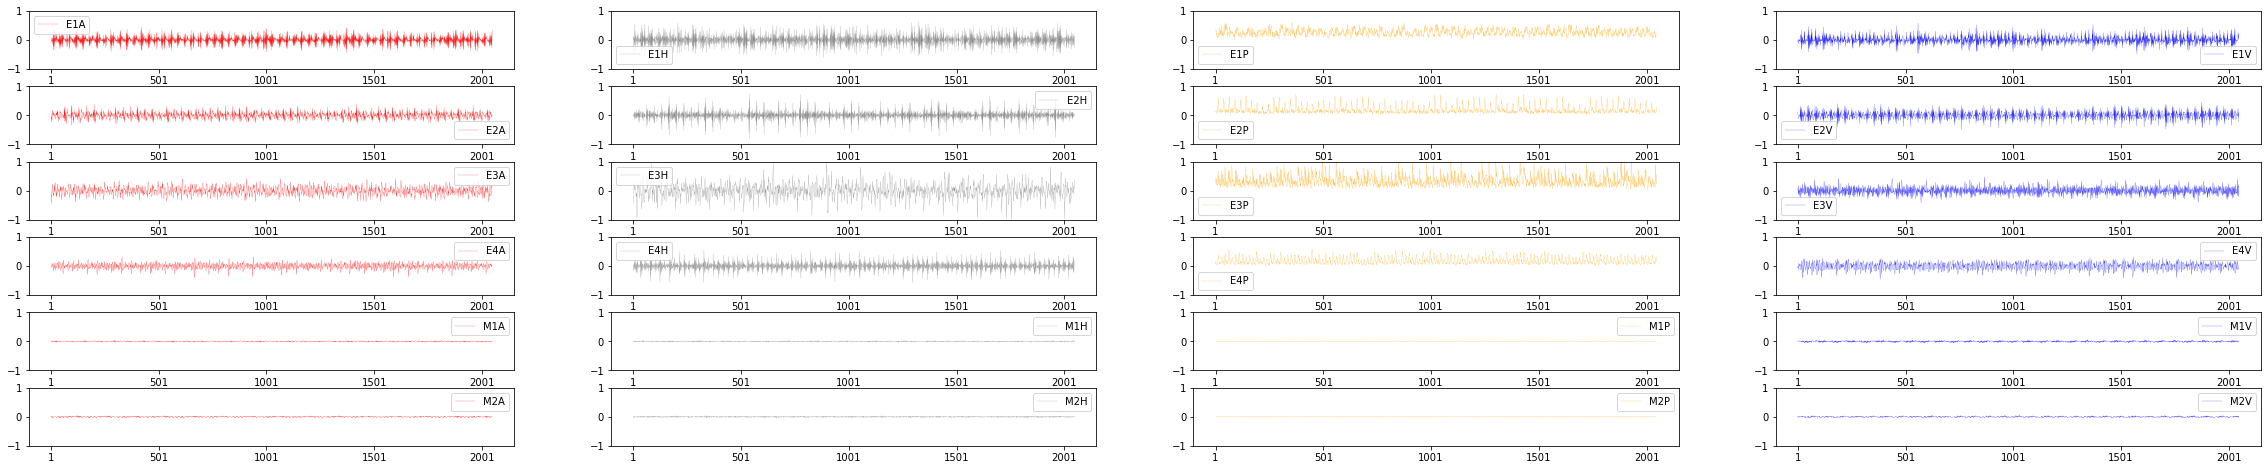

In [115]:
ts_plot(train_observations,4)

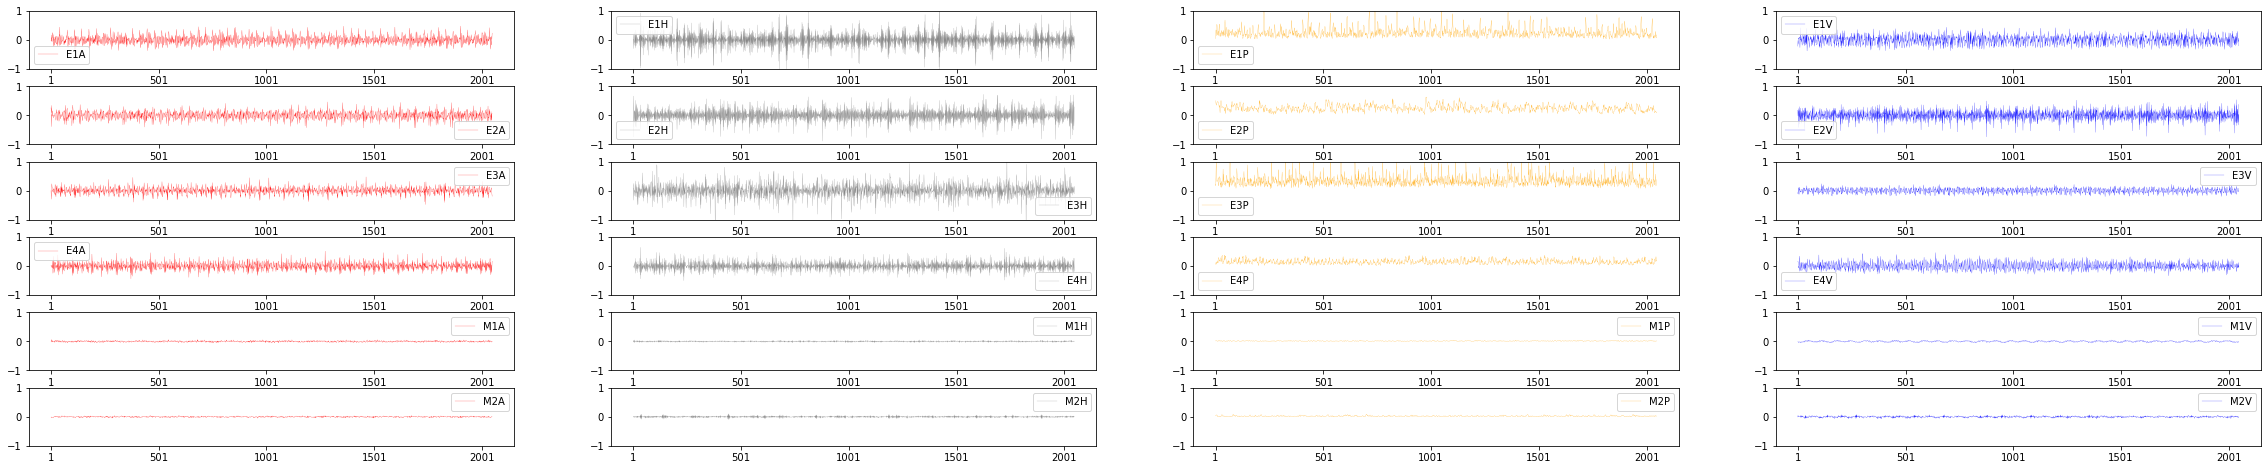

In [116]:
ts_plot(train_observations,658)

* classes **2** samples: `id` = 108,125

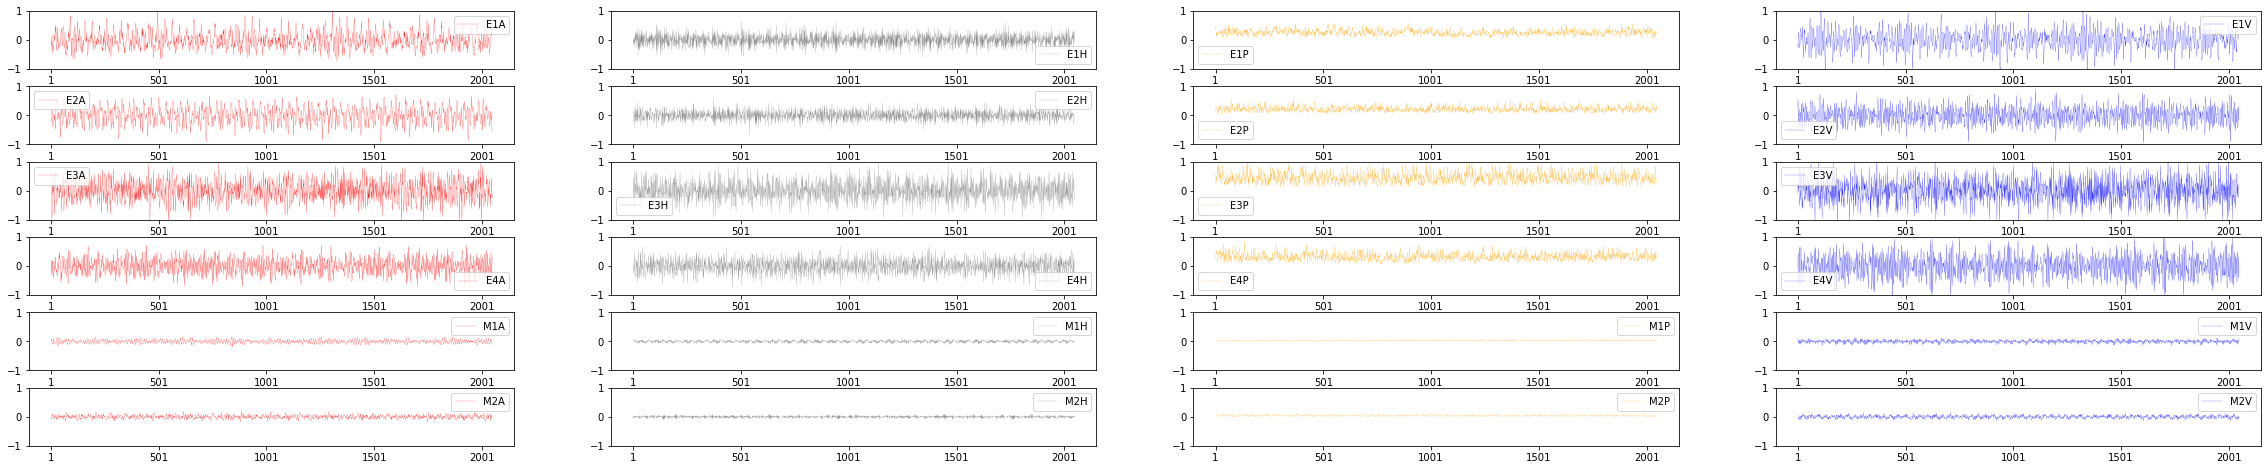

In [117]:
ts_plot(train_observations,71)

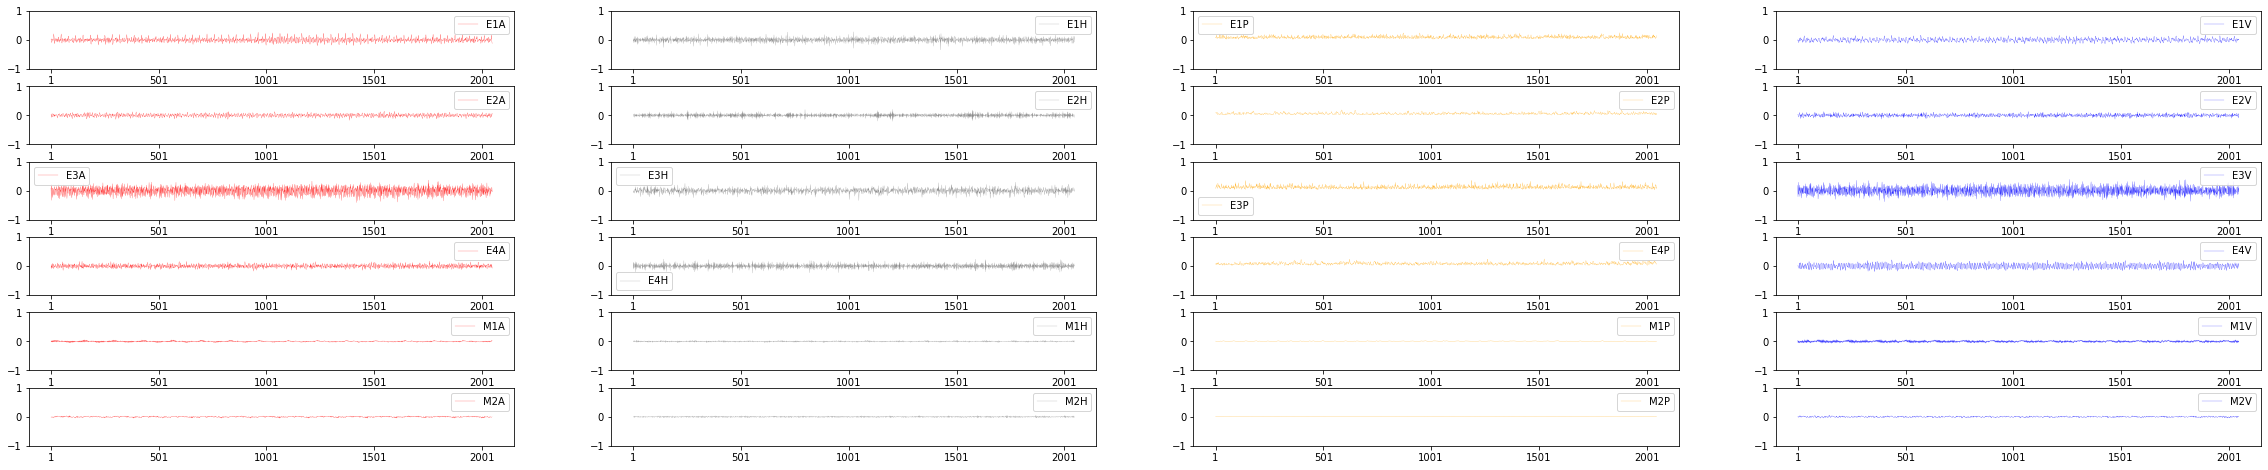

In [118]:
ts_plot(train_observations,81)

* classes **3** samples: `id` = 29,874

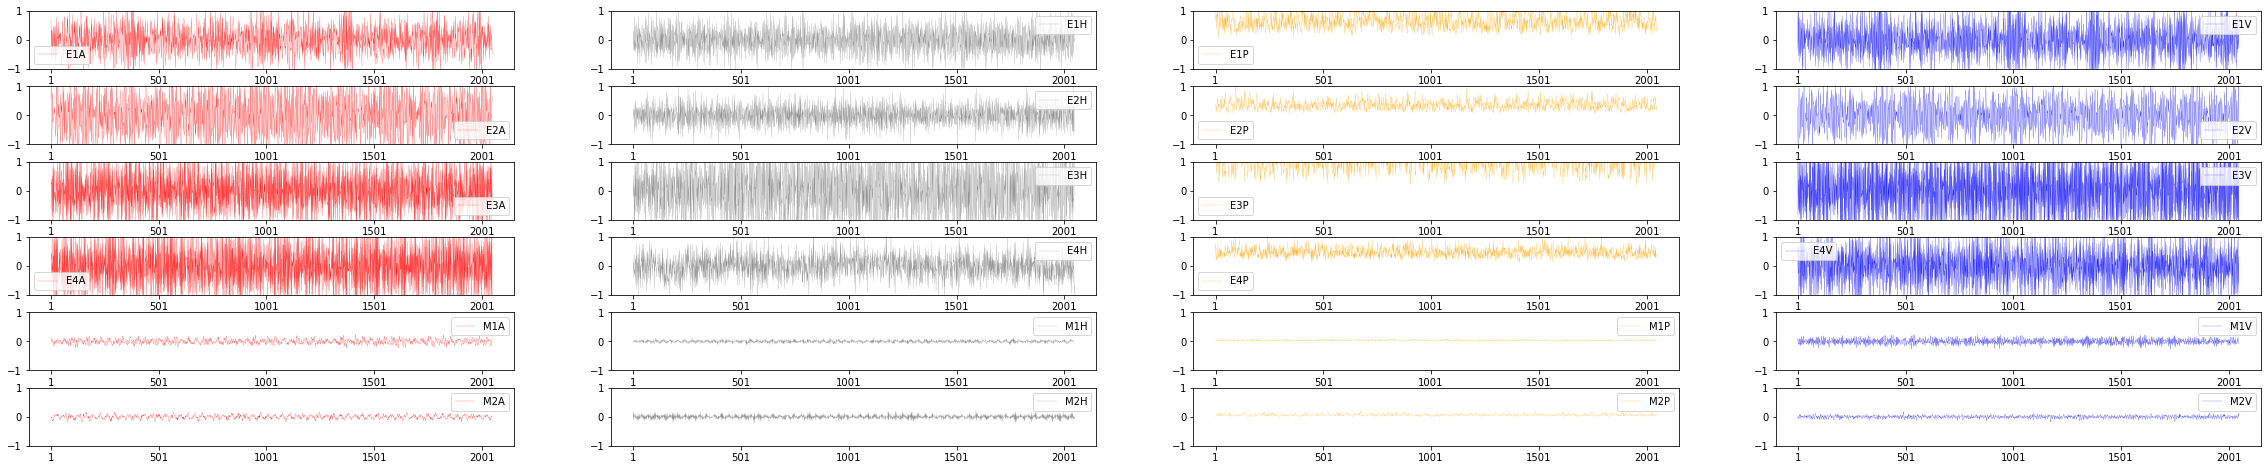

In [119]:
ts_plot(train_observations,19)

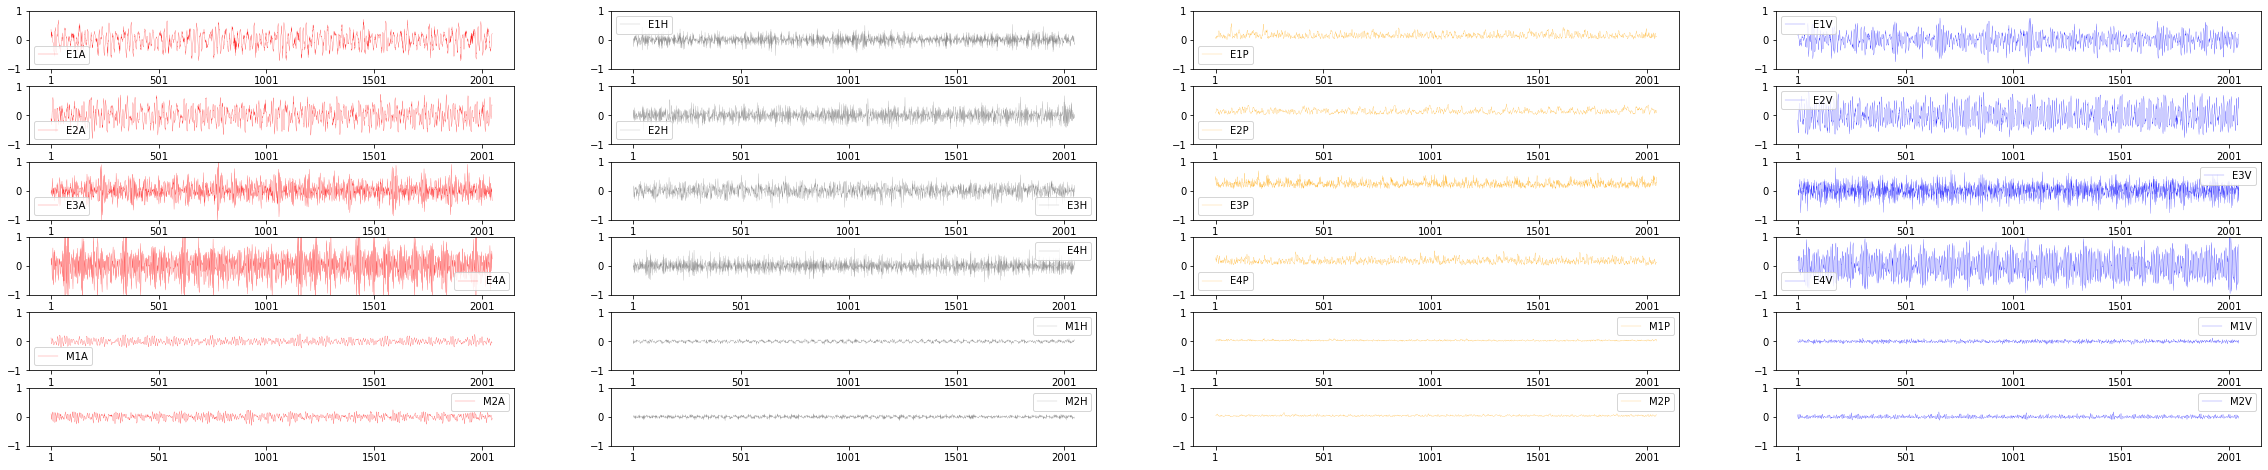

In [120]:
ts_plot(train_observations,568)

### **1° attempt: Circuit model**
The image below shows as the 24 sensors are located over as generic compressor system, in details there are 6 main location each one has 4 sensor of different type '**H**' , '**P**' , '**V**' and '**A**'. Inspired by this organization we decide to try two differnt approach: <br>
1. build six classifiers, each one of them exploiting the data collected by the sensors of a specific main location. Then sum up the six prediction to achieve only one. We tried different strategy for example: the final prediction is  **3** if at least one classifier predict **3** or if more than three classifiers predict **2**, otherwise is **2** if it is predicted once or twice and is **1** if all the predictions are **1** .
2. build two classifiers one exploiting the the data collected by the sensors of the motor (label **M**) and the other one using the sensors of the compressor (label **E**). Then sum up the two prediction to achieve only. We tried different strategy for example: as final prediction select the maximum prediction among the two.

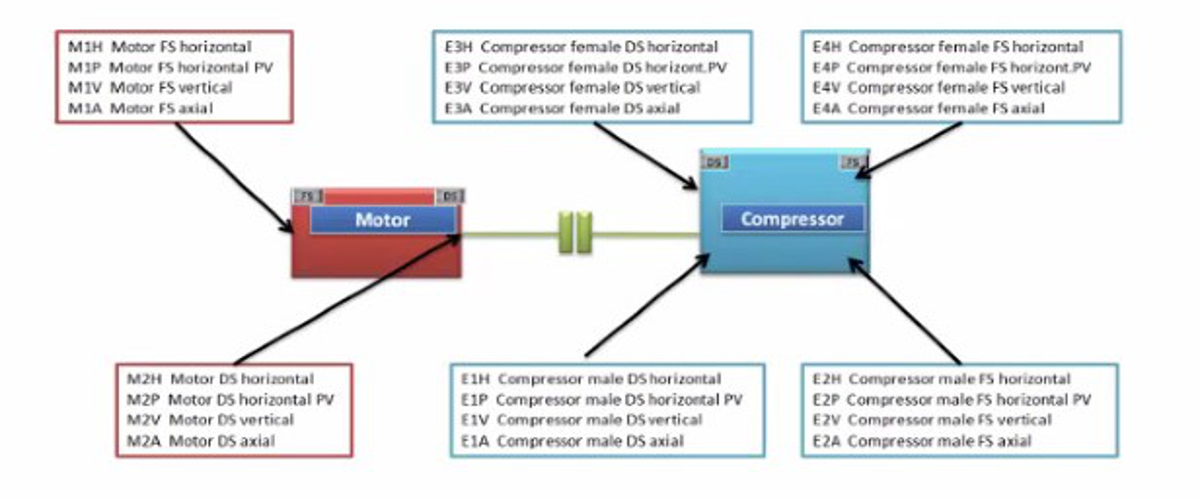

In [46]:
image_path = 'compressor_scheme.jpeg'
image = Image.open(image_path)
new_size = (1200, 500)
resized_image = image.resize(new_size)
display(resized_image)

Said that, we created one list of 'observation-dataframe', similarly to `train_observations`, for each classifier where the columns contains the time series of the sensors used by the classifier. Then we did further preprocessing and data engineering : <br>
* Normalization $\rightarrow$ we normalize the data relatively to a specif sensor type ('**H**','**P**','**V**','**A**');
* Dimensionality reduction $\rightarrow$ we collapse each 'observation-dataframe' in a vector containig the correlation between its feature. <br>

After that we trained the classifiers and in order to avoid problems related to the imbalance we did an **oversampling**, precisely during each cross-validation phase we oversample the current training folders to avoid having syntetic data on the test folder. <br>
We tried to use various models and through a gridsearch operation we optimized their hyperparameters but got poor results (**:(**) around 0.35-0.45 *BAS* score , so we tried to think alternative approaches to the task.